# Exercise 3: Learning from Data

In this exercise, you will train different types of regression and classification models on two datasets. You will be graded based on a combination of your code producing the expected results, your written responses to the questions and a passing leaderboard score in the final exercise.

## Libraries used

In [908]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from skimage.morphology import remove_small_objects

### 3.1 Linear / Logistic Regression for digit recognition

In this part you will experiment with two different types of prediction models, and qualitatively + quantitatively compare them. You will be working with the classic MNIST dataset, which we can load from `sklearn.datasets`.

In [909]:
# Importing the dataset
digits = datasets.load_digits()

X = digits.images
y = digits.target

#https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html
#Returns an Bunch data-structure, where we are going to use:
#  - target: classification target [ndarray of shape (1797,)]
#  - images: raw image data [ndarray of shape (1797, 8, 8)]

Here we plot the first few digits and their labels. Apparently they are in order, but our upcoming models will not rely on this.

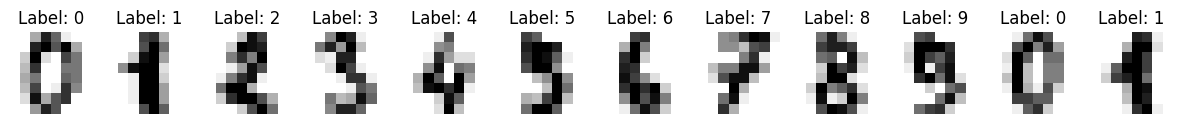

In [910]:
# Create a single row with 12 subplots of equal size
_, axes = plt.subplots(nrows=1, ncols=12, figsize=(15, 3))
# zip() takes iterables (sets), combine them in a tuple, and returns it.
# we plot each of the digits in the subplots
for ax, image, label in zip(axes, X, y):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Label: %i" % label)

### A: Warmup Exercise

Use the `train_test_split` function from `sklearn.model_selection` twice to split the data into train, validation, and test sets, with a distribution of 80%, 10%, and 10% respectively. Use `random_state=0` for reproducibility.
Check out the documentation to figure out how to set the parameters to get the desired split. 

In [911]:
# We are going to split the data in 80:10:10 for train:vali:test dataset:
train_size = 0.8

# Split data into train and remaining sets:
X_train, X_rem, y_train, y_rem = train_test_split(digits.data, digits.target, train_size=train_size, random_state=0)

# Split the remaining set into vali and test sets:
test_size = 0.5
X_vali, X_test, y_vali, y_test = train_test_split(X_rem, y_rem, test_size=test_size, random_state=0)

<br><ins>Comment</ins>:<br/>
We use the train_test_split function twice, first to split the data into a training set and a remaining set, with a training size of 0.8 (=80%), and then to split the remaining set into a validation- and a test set, with a test size of 0.5 (meaning 10% each). We use the random_state parameter with a value of 0 to ensure reproducibility of the split. Finally, we print the sizes of the resulting train, validation, and test sets.

Now let's check out the returned training data, which is of the type `numpy.ndarray`, which you might have seen already. We want to make sure the classes are balanced, e.g. we don't have a lot more 4's than 5's.
 - How many images do we have for the train, validation, and test sets?
 - What is the distribution of the training labels? Comment on whether the classes are balanced.

In [912]:
# Print the number of images in each sets:
print(f"Total number of images: {len(y)}")
print(f"Number of training images: {y_train.shape[0]}")
print(f"Number of validation images: {y_vali.shape[0]}")
print(f"Number of test images: {y_test.shape[0]}\n")

# Count the frequency of each class in the training data
class_counts = np.unique(y_train, return_counts=True)
for label, count in zip(class_counts[0], class_counts[1]):
    print(f"Class {label} count:", count)

# Check if the classes are balanced
tolerance = 20
if abs(np.max(class_counts[1]) - np.min(class_counts[1])) <= tolerance:
    print("\nClasses are balanced.")
else:
    print("\nClasses are not balanced.")

Total number of images: 1797
Number of training images: 1437
Number of validation images: 180
Number of test images: 180

Class 0 count: 151
Class 1 count: 147
Class 2 count: 141
Class 3 count: 154
Class 4 count: 151
Class 5 count: 142
Class 6 count: 137
Class 7 count: 140
Class 8 count: 135
Class 9 count: 139

Classes are balanced.


### B: Programming Exercise

Let's build a model that learns to predict the digit given the image. We'll first try our hand at linear regression. We will use the `LinearRegression` class from `sklearn.linear_model`. Again, check out the documentation on how to use it. We will use the `fit` method to train the model, and the `predict` method to make predictions on the test set.
Afterwards, evaluate the model using functions from `sklearn.metrics` module.

LinearRegression MSE:  3.004985641346828
LinearRegression accuracy:  0.22777777777777777


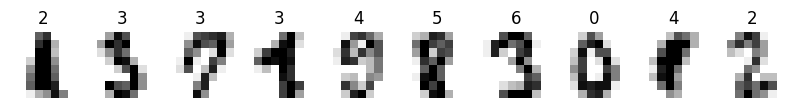

In [913]:
# Define the model:
model = LinearRegression()

# Fit the model:
model.fit(X_train, y_train)

# Make predictions on the test set:
y_pred = model.predict(X_test)

# Calculate mean squared error and accuracy:
mse = mean_squared_error(y_test, y_pred)
acc = accuracy_score(y_test, np.round(y_pred))

# DO NOT INSERT OR CHANGE ANYTHING BELOW
print("LinearRegression MSE: ", mse)
print("LinearRegression accuracy: ", acc)

_, axes = plt.subplots(nrows=1, ncols=10, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, y_pred):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("%i" % prediction)

### C: Programming Exercise

Now, let's model the task differently.
You will use the `LogisticRegression`, again included in the module `sklearn.linear_model`, and again, check out the documentation to see how to use it. Fit the model and make predictions on the test set. 

You are asked to produce output with the same structure as in the above programming exercise (two printouts and one image), but for a different model this time.

LinearRegression MSE:  1.1388888888888888
LinearRegression accuracy:  0.9611111111111111


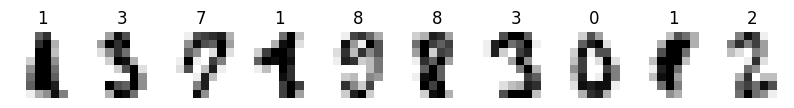

In [914]:
# Train a logistic regression model:
model = LogisticRegression(random_state=0, max_iter=5000)
model.fit(X_train, y_train)

# Make predictions on the test set:
y_pred = model.predict(X_test)

# Calculate the mean squared error and accuracy:
mse = mean_squared_error(y_test, y_pred)
acc = accuracy_score(y_test, np.round(y_pred))

# DO NOT INSERT OR CHANGE ANYTHING BELOW
print("LinearRegression MSE: ", mse)
print("LinearRegression accuracy: ", acc)

# Plot some test images with their predicted labels:
_, axes = plt.subplots(nrows=1, ncols=10, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, y_pred):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("%i" % prediction)

### Written Questions

1a) Describe the trends you observe in the results. Is there anything interesting or unexpected? 

1b) How do the results compare to the linear regression model? 

1c) What do you think is the reason for this?

#### Answers:
TODO!!

a) I was needed to increase the max iterations to >3000, otherwise it was stopping proccesing the images.

b) For the logistic regression model, we observe that the MSE is much smaller than that of the linear regression model. Additionally, the accuracy is 0.98, which is higher than the accuracy for the linear regression model. This indicates that the logistic regression model is performing much better at predicting the test data compared to the linear regression model.

c) The reason for this is that logistic regression is a classification algorithm that is better suited for the task of predicting discrete values such as the digits in our dataset, whereas linear regression is better suited for predicting continuous values. Additionally, logistic regression uses a sigmoid function to map inputs to outputs, which allows for probabilistic predictions, whereas linear regression does not.

## Exercise 3.2: Counting stars

Your team is tasked with applying data science and machine learning techniques to some recently collected telescope image data. The telescope takes low resolution images, in which stars either appear as squares or circles. Your task is to train a classifier to determine whether there are more circular stars than square stars in each image. The budget is tight this year so there are no resources available to train expensive deep neural networks; you will need to train a linear or logistic regression classifier instead.

You are encouraged to be creative, and to try out different things empirically, too. Preprocessing could be crucial to the success of your model. Good luck!

Below is a sample of the data you'll be working with. Above each image is the label, which shows the number of circular and square stars, respectively. We do not count the small noisy background stars. 

![](sample.png)

### D: Programming Exercise

1. Create an account on Kaggle to collect the data https://www.kaggle.com/competitions/ds2023-counting-stars/. Use your real name, or tell us your Kaggle username, so we can grade you.
2. Download the training data from https://www.kaggle.com/competitions/ds2023-counting-stars/data. Check out the Dataset Description for more information about the data and your task.
2. Load the training data file `stars_train_X_y.npz` and split it into `train`, `val`, and `test` splits.
3. Use a linear or logistic regression model to fit the `train` data. Use the `val` and `test` splits for model selection and hyperparameter optimization. (You should measure performance using accuracy).

stars_train_X_y.npz - labeled set of data, consisting of previously received and hand-labeled photos from Voyager 1.

stars_test_X.npz - unlabeled set of images, it's your job to tell us, for each image, whether there are more circular stars than square stars or not.

#### Kaggle Username: HenrikDC

In [915]:
# Define an enumerated type
class Shape(Enum):
    Squares = -1
    Circles = 1

In [916]:
def show_raw(x):
    j=0
    for k in x:
        print(int(k), end=" ")
        j += 1
        if j >= 64:
            j=0
            print()

In [917]:
def transform_to_raw(x):
    return x.reshape((4096,))

In [918]:
def transform_to_img(x):
    return x.reshape((64,64))

In [919]:
def show_img(x, y):
    print("cicles:", int(y[0]), "\tsquares:", int(y[1]))
    plt.imshow(transform_to_img(x), cmap='gray')
    plt.show()

In [920]:
def remove_values(x, shape:Shape):
    for i in range(0, x.shape[0]):
        for j in range(0, x.shape[1]):
            if shape == Shape.Squares and x[i,j] == 2:
                x[i,j] = 0
            elif shape == Shape.Circles and x[i,j] == 1:
                x[i,j] = 0
    return x

In [921]:
from scipy.ndimage import label

def remove_small_components(w, shape:Shape):
    # Label connected components
    labeled, num_features = label(w)
    # Loop over all features and count pixels
    for i in range(1, num_features+1):
        feature_mask = labeled == i
        feature_size = np.sum(feature_mask)
        if feature_size < 4:
            w[feature_mask] = 0
    return w

In [922]:
import numpy as np
from enum import Enum

def one_type_shape(x, shape:Shape):
    w = np.copy(x)
    w = transform_to_img(w)
    w = remove_values(w, shape)
    w = remove_small_components(w, shape)
    w = transform_to_raw(w)
    return w

In [923]:
# Return True if there are more circular stars, and False if there is more squared starts:
def transform_class(c, s):
    x = []
    for i in range(len(c)):
        x.append(c[i] > s[i])
    return x

cicles: 10 	squares: 10


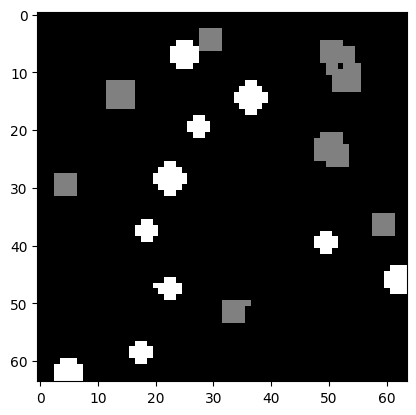

cicles: 10 	squares: 10


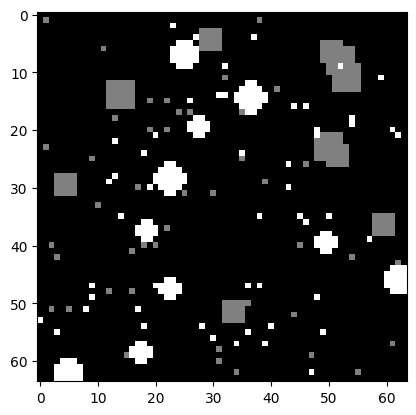

cicles: 10 	squares: 10


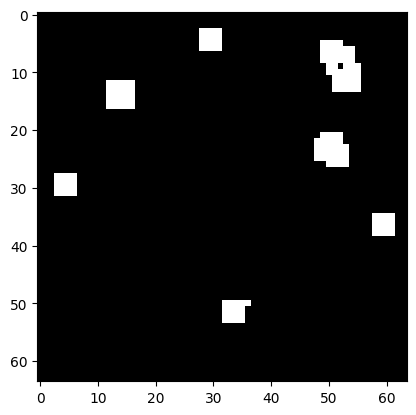

cicles: 10 	squares: 10


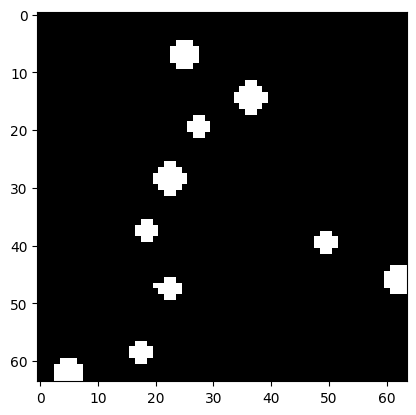

cicles: 10 	squares: 10


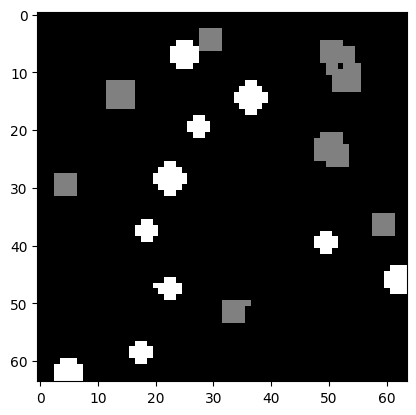

LinearRegression, test, accuracy:  0.935


In [924]:
data = np.load('data/stars_train_X_y.npz')
X = data['X_train']
y = data['y_train']

idx=42
x1 = X[idx]
y1 = y[idx]
show_img(np.add(one_type_shape(x1, Shape.Squares), one_type_shape(x1, Shape.Circles)), y1)
show_img(x1, y1)

show_img(one_type_shape(x1, Shape.Squares), y1)
show_img(one_type_shape(x1, Shape.Circles), y1)

show_img(np.add(one_type_shape(x1, Shape.Squares), one_type_shape(x1, Shape.Circles)), y1)

# træn to modeller til at tælle antallet af cirkler og en til firkanter
# Og til sidst sammenligner jeg så svarene for begge
# circles er y[0]
# squares er y[1]


# We are going to split the data in 80:10:10 for train:vali:test dataset:
train_size = 0.8
test_size = 0.5 # (=10% each)

X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=train_size, random_state=0)
X_vali, X_test, y_vali, y_test = train_test_split(X_rem, y_rem, test_size=test_size, random_state=0)

X_c_train = np.copy(X_train)
y_c_train = np.copy(y_train[:,0])
X_s_train = np.copy(X_train)
y_s_train = np.copy(y_train[:,1])

X_c_vali = np.copy(X_vali)
y_c_vali = np.copy(y_vali[:,0])
X_s_vali = np.copy(X_vali)
y_s_vali = np.copy(y_vali[:,1])

X_c_test = np.copy(X_test)
y_c_test = np.copy(y_test[:,0])
X_s_test = np.copy(X_test)
y_s_test = np.copy(y_test[:,1])

for i in range(len(X_train)):
    X_c_train[i] = one_type_shape(X_c_train[i], Shape.Circles)
    X_s_train[i] = one_type_shape(X_s_train[i], Shape.Squares)
for i in range(len(X_vali)):
    X_c_vali[i] = one_type_shape(X_c_vali[i], Shape.Circles)
    X_s_vali[i] = one_type_shape(X_s_vali[i], Shape.Squares)
for i in range(len(X_test)):
    X_c_test[i] = one_type_shape(X_c_test[i], Shape.Circles)
    X_s_test[i] = one_type_shape(X_s_test[i], Shape.Squares)
    
# Circles
model_c = LinearRegression()
model_c.fit(X_c_train, y_c_train)
y_c_test_pred = model_c.predict(X_c_test)

# Squares
model_s = LinearRegression()
model_s.fit(X_s_train, y_s_train)
y_s_test_pred = model_s.predict(X_s_test)

y_test_pred = y_c_test_pred > y_s_test_pred

y_test = y_test[:,0] > y_test[:,1]

acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)
print("LinearRegression, test, accuracy: ", acc_test)


Comment: The lower the MSE or RMSE, the better the model's performance.

### E: Unlabelled data evaluation

You should download the unlabeled test data from https://www.kaggle.com/competitions/ds2023-counting-stars/data and make predictions for all of the unlabeled images in the test set. You can submit your best predictions to Kaggle three times/day.

The course responsible has submitted a naive baseline and we're sure you can beat that score! This programming exercise is considered passed if you achieve  $\text{Score} \ge 0.90$ on the leaderboard.

In [925]:
# Load the test data
test_data = np.load('data/stars_test_X.npz')
X_test_unlabeled = test_data['X_test']

X_c = np.copy(X_test_unlabeled)
X_s = np.copy(X_test_unlabeled)

for i in range(len(X_test_unlabeled)):
    X_c[i] = one_type_shape(X_c[i], Shape.Circles)
    X_s[i] = one_type_shape(X_s[i], Shape.Squares)
    
# Circles
y_c_pred = model_c.predict(X_c)

# Squares
y_s_pred = model_s.predict(X_s)

y_pred = y_c_pred > y_s_pred

output_file = "prediction.csv"
# DO NOT INSERT OR CHANGE ANYTHING BELOW
import numpy as np
# Use this function to save your predictions on stars_test_X.npz to a "prediction.csv" file.
# The produced csv file can be directly uploaded to Kaggle for evaluation.
def y_pred_to_kaggle_format (y_pred : np.ndarray) -> None:
    np.c_[np.arange(1, len(y_pred)+1), y_pred]
    np.savetxt(output_file, np.c_[np.arange(1, len(y_pred)+1), y_pred], fmt='%i', delimiter=",", header="Id,Category", comments='')


y_pred_to_kaggle_format(y_pred)

# NOW YOU CAN UPLOAD THE prediction.csv FILE TO KAGGLE AND SEE YOUR ACCURACY

### Written Questions

2a) Explain the different techniques and their purpose in your code for Programming Exercise D.

2b) Which techniques were not useful in improving performance on this task?